Exploratory Data Analysis for Tennis Rackets 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [23]:
df_rackets = pd.read_csv('racquet_data.csv')
df_rackets

,Manufacturer,Name,Headsize (sq_inch),Length (inn),Strung Weight (oz),Balance,Swingweight,Beamwidth,Power Level,Stiffness,Stringing Pattern
0,Babolat,Babolat Aero 112,112,27.5,10.20,6pts HH,346,0.0,High,64,16 Mains/19 Crosses
1,Babolat,Babolat Pure Storm Team,98,27.0,11.00,3pts HL,326,21.0,Low-Medium,64,16 Mains/20 Crosses
2,Babolat,Babolat Aero Blast,112,27.5,10.20,6pts HH,340,0.0,High,65,16 Mains/19 Crosses
3,Babolat,Babolat Pure Storm Team MP,103,27.0,10.70,1pts HH,329,22.5,Medium,67,16 Mains/20 Crosses
4,Babolat,Babolat Pure Control Team Plus Midplus,100,27.5,11.60,8pts HL,338,21.5,Low-Medium,64,16 Mains/20 Crosses
...,...,...,...,...,...,...,...,...,...,...,...
788,Volkl,Volkl Power Bridge 9 Junior 26,102,26.0,9.50,3pts HH,240,24.0,Medium,58,16 Mains/19 Crosses
789,Volkl,Volkl Organix 8 (300g) - 2011,100,27.0,11.40,4pts HL,330,23.5,Medium,68,16 Mains/18 Crosses
790,Volkl,Volkl Organix 6 - 2011,100,27.0,10.22,0pts EB,306,24.0,Medium-High,65,16 Mains/18 Crosses
791,Volkl,Volkl Organix 4 - 2011,105,27.6,10.20,5pts HL,306,25.0,Medium-High,65,16 Mains/19 Crosses


Data Cleaning

7.6% of the power level data is missing

In [24]:
#missing data 

total = df_rackets.isnull().sum().sort_values(ascending=False)
percent = (df_rackets.isnull().sum()/df_rackets.isnull().count()).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



,Total,Percent
Power Level,60,0.075662
Manufacturer,0,0.000000
Name,0,0.000000
Headsize (sq_inch),0,0.000000
Length (inn),0,0.000000
Strung Weight (oz),0,0.000000
Balance,0,0.000000
Swingweight,0,0.000000
Beamwidth,0,0.000000
Stiffness,0,0.000000


Pre-Processing

In [25]:
df_rackets = df_rackets.drop(df_rackets.loc[df_rackets["Power Level"].isnull()].index)
df_rackets.isnull().sum().max() #just checking that there's no missing data missing...

0

In [26]:
df_rackets

,Manufacturer,Name,Headsize (sq_inch),Length (inn),Strung Weight (oz),Balance,Swingweight,Beamwidth,Power Level,Stiffness,Stringing Pattern
0,Babolat,Babolat Aero 112,112,27.5,10.20,6pts HH,346,0.0,High,64,16 Mains/19 Crosses
1,Babolat,Babolat Pure Storm Team,98,27.0,11.00,3pts HL,326,21.0,Low-Medium,64,16 Mains/20 Crosses
2,Babolat,Babolat Aero Blast,112,27.5,10.20,6pts HH,340,0.0,High,65,16 Mains/19 Crosses
3,Babolat,Babolat Pure Storm Team MP,103,27.0,10.70,1pts HH,329,22.5,Medium,67,16 Mains/20 Crosses
4,Babolat,Babolat Pure Control Team Plus Midplus,100,27.5,11.60,8pts HL,338,21.5,Low-Medium,64,16 Mains/20 Crosses
...,...,...,...,...,...,...,...,...,...,...,...
788,Volkl,Volkl Power Bridge 9 Junior 26,102,26.0,9.50,3pts HH,240,24.0,Medium,58,16 Mains/19 Crosses
789,Volkl,Volkl Organix 8 (300g) - 2011,100,27.0,11.40,4pts HL,330,23.5,Medium,68,16 Mains/18 Crosses
790,Volkl,Volkl Organix 6 - 2011,100,27.0,10.22,0pts EB,306,24.0,Medium-High,65,16 Mains/18 Crosses
791,Volkl,Volkl Organix 4 - 2011,105,27.6,10.20,5pts HL,306,25.0,Medium-High,65,16 Mains/19 Crosses


In [27]:
# descriptive statistics summary; beamwidth shows several values with 0, need to drop columns; 
df_rackets["Beamwidth"].describe()

count    733.000000
mean      17.332060
std       10.848518
min        0.000000
25%        0.000000
50%       22.000000
75%       25.000000
max       33.000000
Name: Beamwidth, dtype: float64

In [28]:
df_rackets = df_rackets.drop(df_rackets.loc[df_rackets["Beamwidth"] == 0].index)
df_rackets.loc[df_rackets['Manufacturer']=='["Dunlop', 'Manufacturer'] = 'Dunlop'
df_rackets.loc[df_rackets['Manufacturer']=='2013/Tecnifibre', 'Manufacturer'] = 'Tecnifibre'



df_rackets["HL or HH"] = np.where(df_rackets['Balance'].str.contains("HL"), 'Head Light', 'Head Heavy')
df_rackets["Points of Balance"] = df_rackets['Balance'].str.split("").str[1]
df_rackets

,Manufacturer,Name,Headsize (sq_inch),Length (inn),Strung Weight (oz),Balance,Swingweight,Beamwidth,Power Level,Stiffness,Stringing Pattern,HL or HH,Points of Balance
1,Babolat,Babolat Pure Storm Team,98,27.0,11.00,3pts HL,326,21.0,Low-Medium,64,16 Mains/20 Crosses,Head Light,3
3,Babolat,Babolat Pure Storm Team MP,103,27.0,10.70,1pts HH,329,22.5,Medium,67,16 Mains/20 Crosses,Head Heavy,1
4,Babolat,Babolat Pure Control Team Plus Midplus,100,27.5,11.60,8pts HL,338,21.5,Low-Medium,64,16 Mains/20 Crosses,Head Light,8
7,Babolat,Babolat Pure Storm Tour Plus,98,27.5,11.80,9pts HL,336,21.0,Low,62,16 Mains/20 Crosses,Head Light,9
8,Babolat,Babolat Drive Z Oversize,110,27.5,10.10,5pts HH,327,27.0,Medium-High,64,16 Mains/20 Crosses,Head Heavy,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,Volkl,Volkl Power Bridge 9 Junior 26,102,26.0,9.50,3pts HH,240,24.0,Medium,58,16 Mains/19 Crosses,Head Heavy,3
789,Volkl,Volkl Organix 8 (300g) - 2011,100,27.0,11.40,4pts HL,330,23.5,Medium,68,16 Mains/18 Crosses,Head Light,4
790,Volkl,Volkl Organix 6 - 2011,100,27.0,10.22,0pts EB,306,24.0,Medium-High,65,16 Mains/18 Crosses,Head Heavy,0
791,Volkl,Volkl Organix 4 - 2011,105,27.6,10.20,5pts HL,306,25.0,Medium-High,65,16 Mains/19 Crosses,Head Light,5


Univariate Analysis

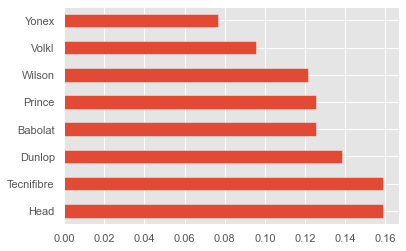

In [29]:
df_rackets['Manufacturer'].value_counts(normalize = True).plot.barh()
plt.show()


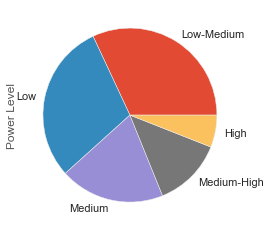

In [30]:
df_rackets['Power Level'].value_counts(normalize = True).plot.pie()
plt.show()


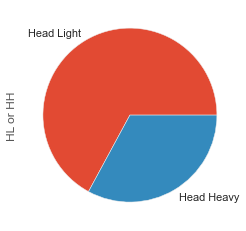

In [31]:
df_rackets["HL or HH"].value_counts(normalize = True).plot.pie()
plt.show()

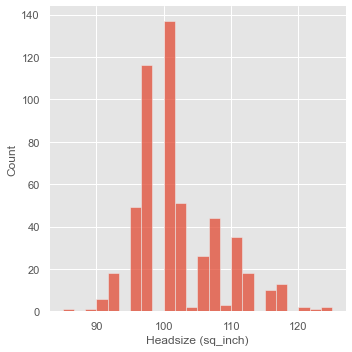

In [32]:
#univeriate analysis on racket specs
sns.displot(df_rackets["Headsize (sq_inch)"])


In [33]:
#skewnness and kurtosis; skewness is a measure of symmetry, kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution
#skewness shoudl be between -0.5 and 0.5, kurtosis should be between 3 and 7
print("Skewness: %f" % df_rackets["Headsize (sq_inch)"].skew())
print("Kurtosis: %f" % df_rackets["Headsize (sq_inch)"].kurt())

# head_size_scaled = StandardScaler().fit_transform(df_rackets["Headsize (sq_inch)"][:,np.newaxis]);
# low_range = head_size_scaled[head_size_scaled[:,0].argsort()][:10]
# high_range = head_size_scaled[head_size_scaled[:,0].argsort()][-10:]
# print(low_range, high_range)

Skewness: 0.941541
Kurtosis: 0.848156


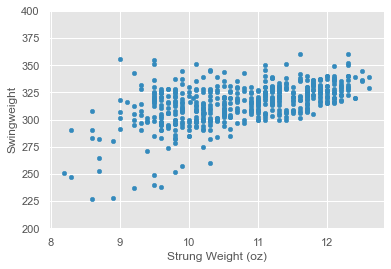

In [34]:
#Bivariate analysis
#scatter plot
var = 'Strung Weight (oz)'
data = pd.concat([df_rackets['Strung Weight (oz)'], df_rackets['Swingweight']], axis=1)
data.plot.scatter(x=var, y='Swingweight', ylim=(200,400));


(-0.5, 4.5, 70.0, 150.0)

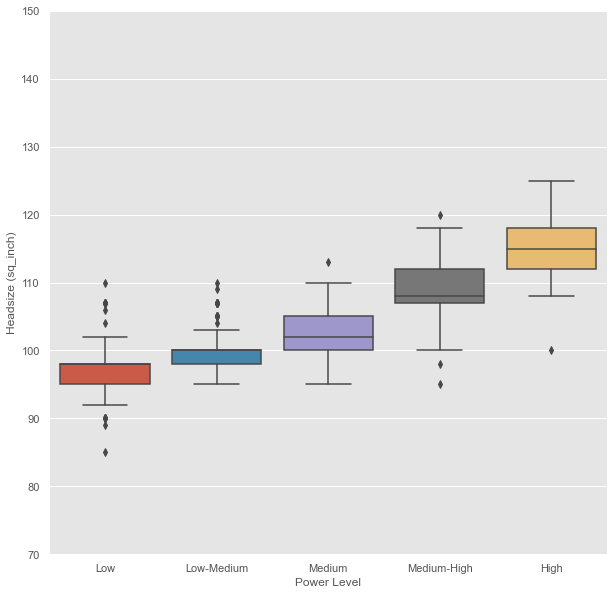

In [35]:
#box plot for categorial data
var = 'Power Level'
data = pd.concat([df_rackets['Power Level'], df_rackets['Headsize (sq_inch)']], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="Headsize (sq_inch)", data=data, order = ['Low', 'Low-Medium', 'Medium', 'Medium-High','High'])
fig.axis(ymin = 70, ymax = 150)

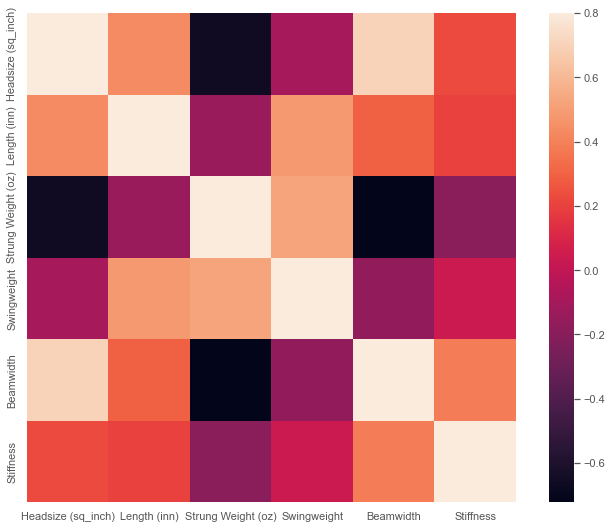

In [36]:
#Multivariate analysis
#correlation matrix
corr_mat = df_rackets.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);
#We can see that Headsize and Beam width are highly correlated, and least correlated with strung weight

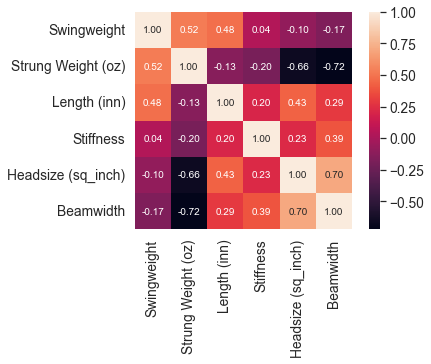

In [37]:
#Swing weight correlation matrix
k = 6
cols = corr_mat.nlargest(k, 'Swingweight')['Swingweight'].index
cm = np.corrcoef(df_rackets[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

c:\Users\BetaKraken\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


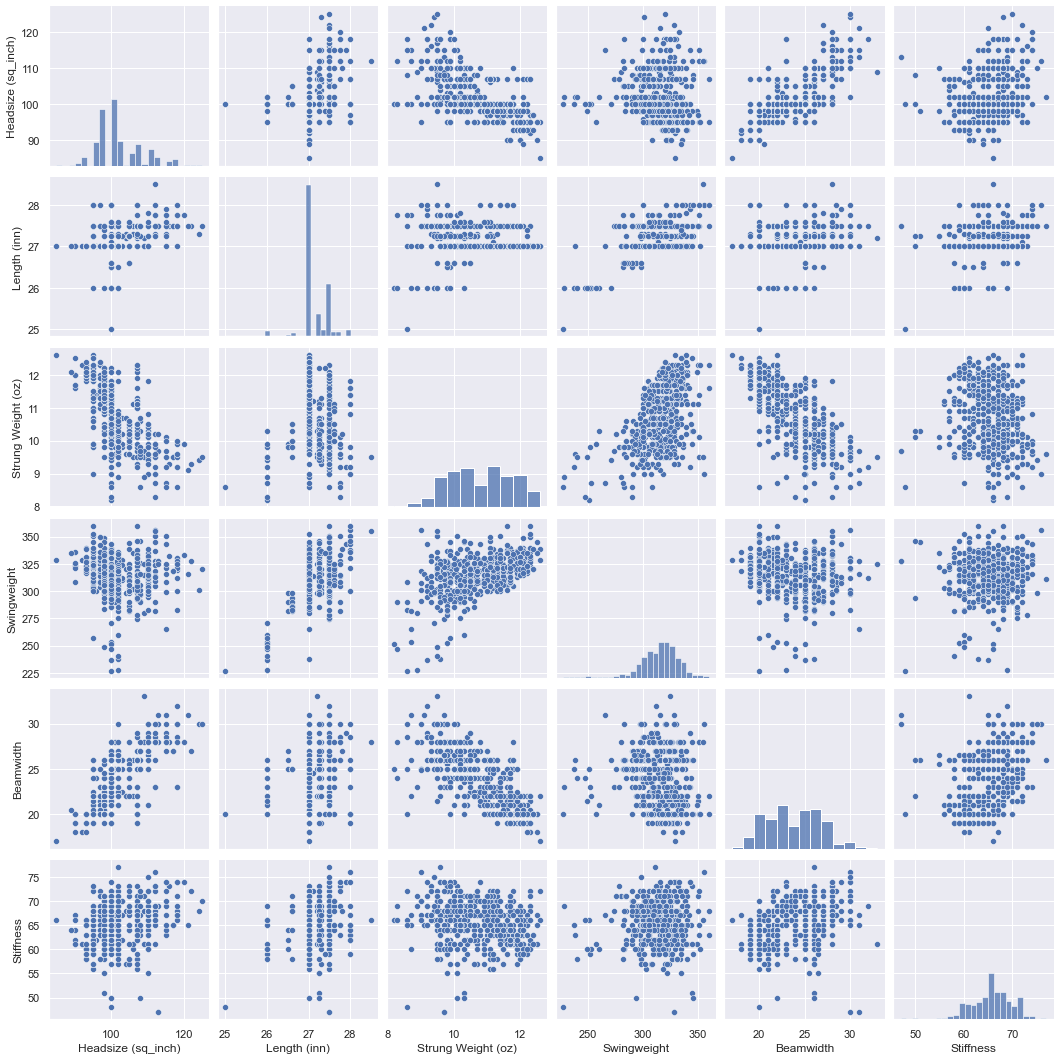

In [38]:
#scatterplot with pairplot to look at correlation
sns.set()
cols = ['Headsize (sq_inch)', 'Length (inn)', 'Strung Weight (oz)', 'Swingweight', 'Beamwidth', 'Stiffness']
sns.pairplot(df_rackets[cols], size = 2.5)
plt.show()

All numeric features standardized - Ready for PCA

In [39]:
# #scale all numeric features
# scale_features = df_rackets.copy()
# col_names = ['Headsize (sq_inch)', 'Length (inn)', 'Strung Weight (oz)', 'Swingweight', 'Beamwidth', 'Stiffness']
# features = scale_features[col_names]
# scaler = StandardScaler().fit(features.values)
# features = scaler.transform(features.values)

# scale_features[col_names] = features


# scale_features

PCA and Model Evaluation

In [40]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

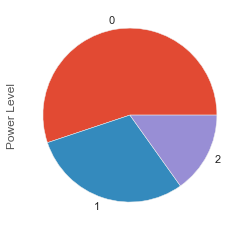

In [41]:
col_names = ['Headsize (sq_inch)', 'Length (inn)', 'Strung Weight (oz)', 'Swingweight', 'Beamwidth', 'Stiffness']

# #convert Low-medium to low and high-medium to high, and convert to 0, 1, 2 for Low, Medium, and High
df_rackets.loc[(df_rackets['Power Level']=='Low-Medium') & (df_rackets["HL or HH"] =='Head Light'), 'Power Level'] = 'Low'
df_rackets.loc[(df_rackets['Power Level']=='Low-Medium') & (df_rackets["HL or HH"] =='Head Heavy'), 'Power Level'] = 'Medium'

df_rackets.loc[(df_rackets['Power Level']=='Medium-High') & (df_rackets["HL or HH"] =='Head Light'), 'Power Level'] = 'Medium'
df_rackets.loc[(df_rackets['Power Level']=='Medium-High') & (df_rackets["HL or HH"] =='Head Heavy'), 'Power Level'] = 'High'

# df_rackets.loc[df_rackets['Power Level']=='Medium-High', 'Power Level'] = 'High'

df_rackets.loc[df_rackets['Power Level']=='Low', 'Power Level'] = 0
df_rackets.loc[df_rackets['Power Level']=='Medium', 'Power Level'] = 1
df_rackets.loc[df_rackets['Power Level']=='High', 'Power Level'] = 2


df_rackets.to_csv('racket_data_cleaned.csv')
df_rackets['Power Level'].value_counts(normalize = True).plot.pie()
plt.show()


X = df_rackets[col_names].values
y = df_rackets['Power Level'].values.astype('int')



In [42]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
kfold = model_selection.KFold(n_splits=10)


In [43]:
#scale the data for training set and apply to test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [45]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [46]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.761462 (0.059441)
LDA: 0.747453 (0.051451)
KNN: 0.698283 (0.052509)
CART: 0.663178 (0.063699)
NB: 0.749779 (0.049642)
SVM: 0.735714 (0.048398)


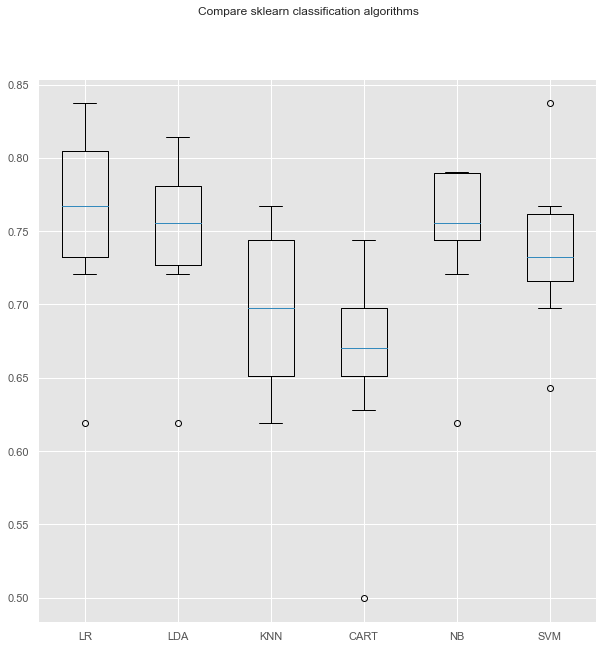

In [47]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()